In [1]:
import numpy as np
import smplotlib
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
gaussian_opacity = lambda x, tau0: tau0 * np.exp(-x**2 / 2)

In [3]:
def equivalent_width(tau0):
    integrand = lambda x: (1 - np.exp(-gaussian_opacity(x, tau0)))
    result, _ = integrate.quad(integrand, -np.inf, np.inf)
    return result

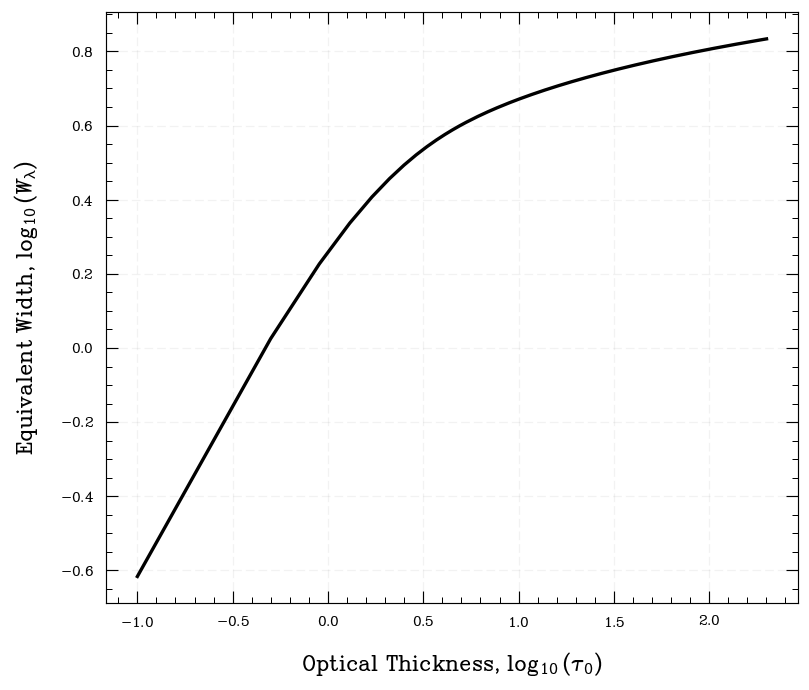

In [4]:
tau0_values = np.linspace(0.1, 200, 500)

W_lambda_values = [equivalent_width(tau0) for tau0 in tau0_values]

fig, ax = plt.subplots(figsize = (7, 6))
ax.grid(alpha = 0.1)
plt.xticks(fontsize = 10); plt.yticks(fontsize = 10)
ax.set_xlabel(r'Optical Thickness, $\log_{10}(\tau_0)$', fontsize = 15, labelpad = 12)
ax.set_ylabel(r'Equivalent Width, $\log_{10}(W_\lambda)$', fontsize = 15, labelpad = 12)
ax.plot(np.log10(tau0_values), np.log10(W_lambda_values), lw = 2, color = 'black', ls = 'solid', label = 'Gaussian Profile')

plt.tight_layout()
plt.savefig('Q01_CurveOfGrowth.pdf', dpi = 800)